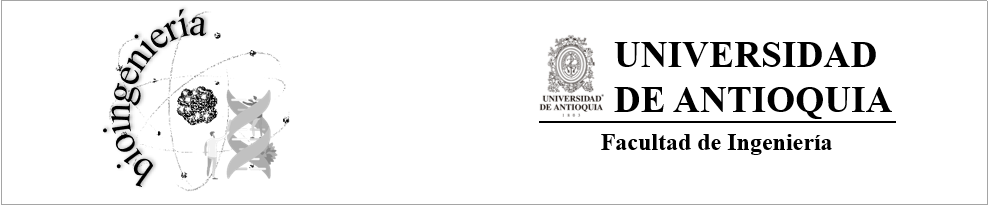

# Random Forest - RF

RF es un tipo de Algoritmo de Ensamble en Machine Learning en donde se combinan diferentes árboles y la salida de cada uno se contará como “un voto” y la opción más votada será la respuesta del _Bosque Aleatorio_ (RF), lo anterior en el caso de problemas de clasificación. Para los problemas de regresión, se calcula el promedio entre las respuestas de los diferentes árboles usados.

Documentación de Sci-Kit Learn: [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) y [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

### ¿Por qué la idea de bosque?

Uno de los problemas que presenta el algoritmo de árbol de decisión es que si le damos la profundidad suficiente, el árbol tiende a “memorizar” las soluciones en vez de generalizar el aprendizaje. Es decir, empieza a padecer de memoria (_overfitting_). Para evitar esto, la solución fue crear muchos árboles y que trabajen en conjunto.

### ¿Cómo funciona Random Forest?

1. Se seleccionan las $k$ características (_features_) del total de características del conjunto de datos y se crea un árbol de decisión con esas $k$ características.
2. Se Crean $n$ árboles variando siempre la cantidad de las $k$ características. También se podría variar la cantidad de muestras que pasan a esos árboles (esto es conocido como “bootstrap sample”)
3. Se Toman cada uno de los $n$ árboles y se hace la misma clasificación o regresión. Se guardan el resultado de cada árbol obteniendo $n$ salidas.
4. Para el caso de clasificación, se calculan los votos obtenidos para cada “clase” seleccionada y se considera a la más votada como la clasificación final del “bosque”.
5. Para el caso de regresión, se calcula el promedio con todos los datos numéricos de salida que obtendrá cada uno de los árboles y ese promedio será el valor a asignar a las muestras nuevas.

### ¿Por qué es aleatorio?

El algoritmo cuenta con una _"doble aleatoriedad"_: tanto en la selección del valor $k$ características para cada árbol como en la cantidad de $muestras$ que se usarán para entrenar cada árbol creado.

### Ventajas y Desventajas del uso de Random Forest

#### Ventajas:
* Tiene buen desempeño -aún- sin ajustar los hiperparámetros.
* Funciona bien para problemas de clasificación y regresión.
* Al utilizar múltiples árboles se reduce el riesgo de overfiting.
* Se mantiene estable con nuevas muestras puesto que al utilizar cientos de árboles sigue prevaleciendo el promedio de sus votaciones.

#### Desjeventajas:
* Si bien tiene menos riesgo de _overfitting_, no es infalible.
* Tiene “costo” computacional alto. Se deben crear y ejecutar cientos de árbol de decisión.
* Requerir más tiempo de entrenamiento (varía según el problema)
* RF no funciona bien con datasets pequeños.
* Difícil poder interpretar los <\<cientos\>> de árboles creados en el bosque.

## ¿Qué es overfitting y underfitting?

$overfitting$ "sobreajuste" y $underfitting$  "subajuste", hacen referencia al fallo del modelo al generalizar -$fit$- el conocimiento que pretendemos que adquieran.

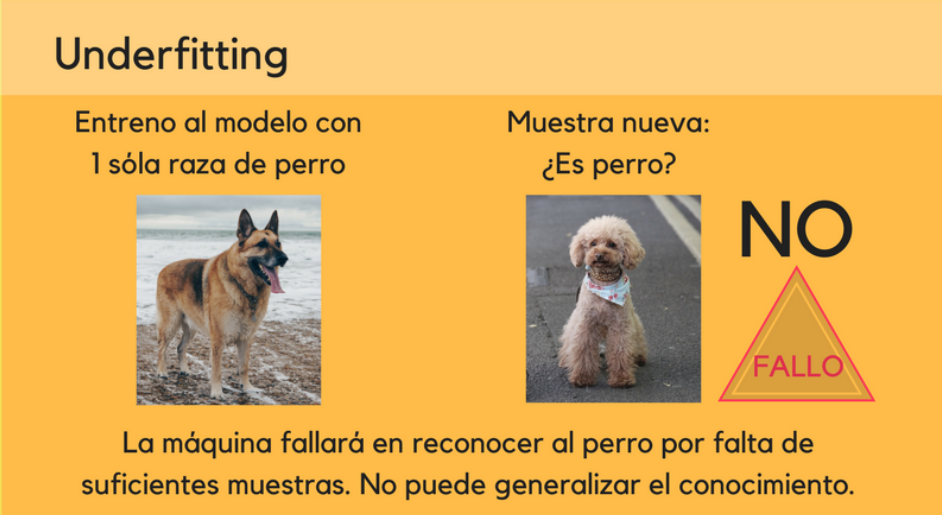

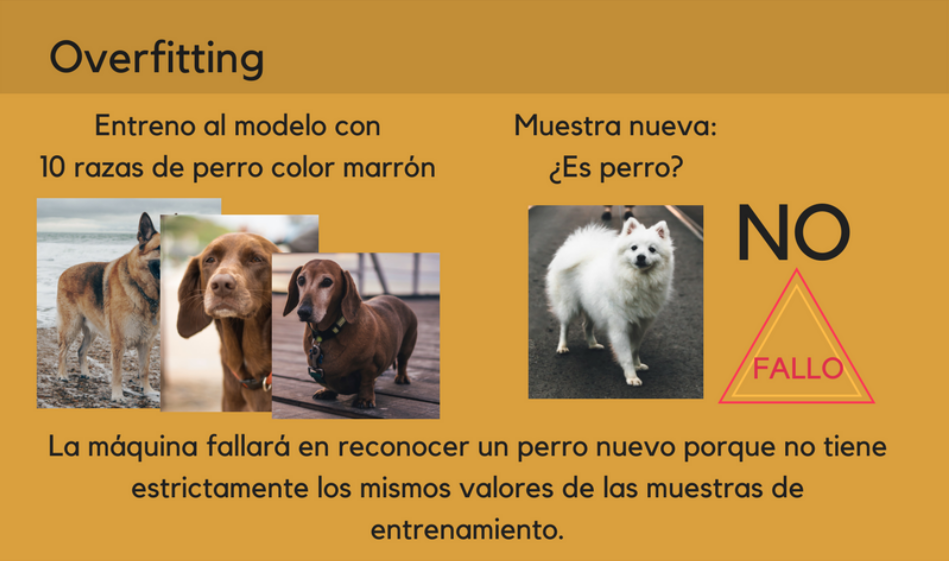

## $Overfitting$ en Machine Learning
Es muy común que en los inicios del aprendizaje en machine learning se caiga en el problema del $Overfitting$. Lo que ocurrirá es que la máquina sólo se ajustará a aprender los casos particulares que le enseñó en el entrenamiento (train) y será incapaz de reconocer nuevos datos de entrada (test).

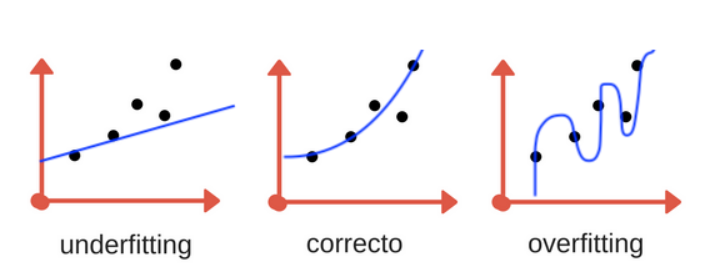

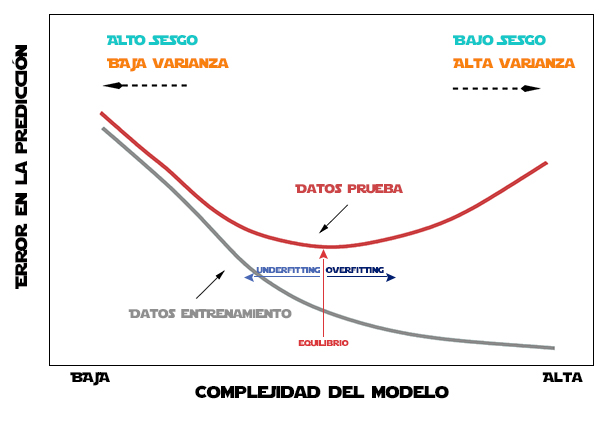

## Prevenir el $overfitting$ de datos

1. Cantidad mínima de muestras
2. Clases variadas y equilibradas en cantidad
3. Conjunto de $Test$ de datos.
4. Parameter Tunning o Ajuste de Parámetros.
5. Cantidad excesiva de Dimensiones.
6. ANN - capas ocultas en exceso.

# Descripción de la base de datos y del problema

El conjunto de datos de diabetes de los indios Pima implica predecir la aparición de la diabetes dentro de los 5 años en los indios Pima dados los detalles médicos.

Es un problema de clasificación binario (2 clases). El número de observaciones para cada clase no está equilibrado. Hay 768 observaciones con 8 variables de entrada y 1 variable de salida. Se cree que los valores que faltan están codificados con valores cero. Los nombres de las variables son los siguientes:

1. Número de embarazos.
2. Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia a la glucosa oral.
3. Presión arterial diastólica (mm Hg).
4. Espesor del pliegue cutáneo del tríceps (mm).
5. Insulina sérica de 2 horas (mu U/ml).
6. Índice de masa corporal ($\frac{w}{m^2}$).
7. Función del pedigrí de la diabetes.
8. Edad (Años).
9. Variable de clase (0 o 1).


Fuente de descripción del dataset: https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names

# Experimentación

### Carga de las librerías a usar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split , KFold

In [2]:
from sklearn.datasets import load_diabetes

### Carga del archivo csv (DataSet)

In [3]:
# https://github.com/angelower/infomed20251/blob/main/data/dia_db.csv
# !wget https://raw.githubusercontent.com/angelower/infomed20251/main/data/dia_db.csv
df = pd.read_csv("dia_db.csv")
df

--2025-05-13 12:50:15--  https://raw.githubusercontent.com/angelower/infomed20251/main/data/dia_db.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21900 (21K) [text/plain]
Saving to: ‘dia_db.csv’

dia_db.csv          100%[===================>]  21.39K  --.-KB/s    in 0.006s  

2025-05-13 12:50:16 (3.32 MB/s) - ‘dia_db.csv’ saved [21900/21900]



,Num_pregnant,Glucose_2-hours,Diastolic_bloob_pressure,Triceps_skinfold,Insulin_2-hours,imc,function_dia,age,target
0,6,148,72,35,0,33.6,627,50,1
1,1,85,66,29,0,26.6,351,31,0
2,8,183,64,0,0,23.3,672,32,1
3,1,89,66,23,94,28.1,167,21,0
4,0,137,40,35,168,43.1,2288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,171,63,0
764,2,122,70,27,0,36.8,340,27,0
765,5,121,72,23,112,26.2,245,30,0
766,1,126,60,0,0,30.1,349,47,1


####  Características o Variables de entrada (Features)

In [4]:
X = df.iloc[:,:8]
X.head(5)

,Num_pregnant,Glucose_2-hours,Diastolic_bloob_pressure,Triceps_skinfold,Insulin_2-hours,imc,function_dia,age
0,6,148,72,35,0,33.6,627,50
1,1,85,66,29,0,26.6,351,31
2,8,183,64,0,0,23.3,672,32
3,1,89,66,23,94,28.1,167,21
4,0,137,40,35,168,43.1,2288,33


####  Etiquetas, Clases o Salida (Target)

In [5]:
y = df.iloc[:,8]
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: target, dtype: int64

##  Análisis Exploratorio

In [6]:
X.describe()

,Num_pregnant,Glucose_2-hours,Diastolic_bloob_pressure,Triceps_skinfold,Insulin_2-hours,imc,function_dia,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,471.876302,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,331.328595,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.000000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,243.750000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,372.500000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,626.250000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2420.000000,81.000000


target
0    500
1    268
Name: count, dtype: int64


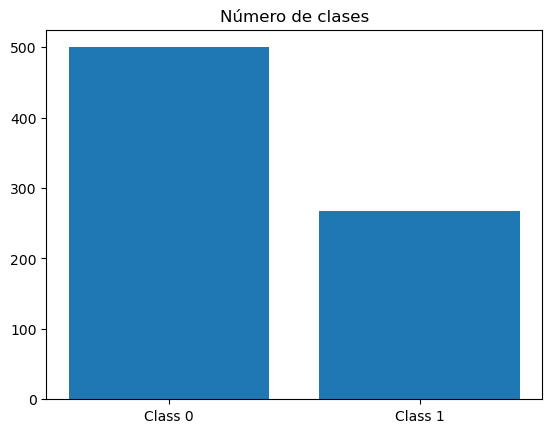

In [7]:
print(y.value_counts())
plt.bar(['Class 0','Class 1'],y.value_counts())
plt.title("Número de clases")
plt.show()

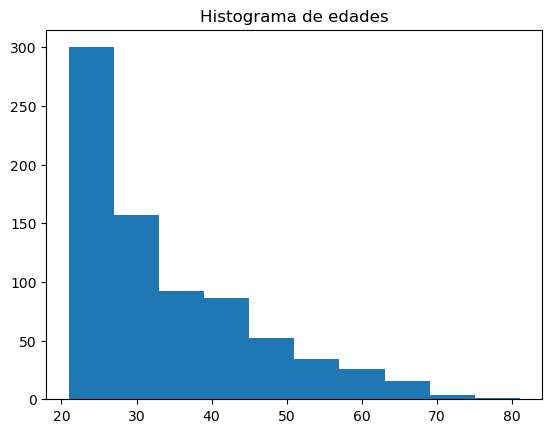

In [8]:
plt.hist(X.age)
plt.title("Histograma de edades")
plt.show()

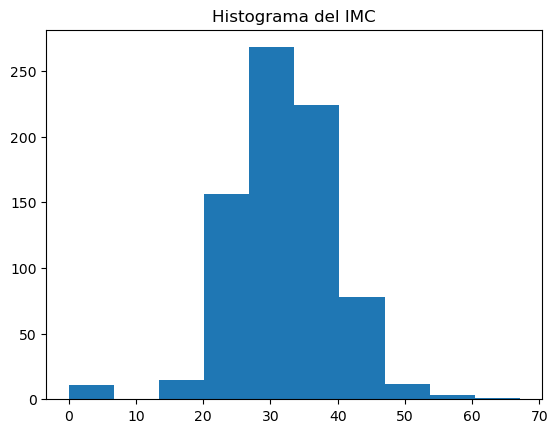

In [9]:
plt.hist(X.imc)
plt.title("Histograma del IMC")
plt.show()

## Separación de muestras para train y test

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X, y)

print("Train: ",X_train.shape , y_train.shape)
print("Test: ",X_test.shape , y_test.shape)

Train:  (576, 8) (576,)
Test:  (192, 8) (192,)


## Definición del modelo RF y entrenamiento

In [11]:
rf = RandomForestClassifier()
rf.fit(X_train , y_train)
rf.score(X_test , y_test)

0.8177083333333334

In [12]:
# Lista de árboles
arboles = rf.estimators_
print(f"Número de árboles: {len(arboles)}")

Número de árboles: 100


## Se pueden conocer los votos por cada estimador

In [13]:
# DataFrame para almacenar los votos
votos = pd.DataFrame()

# Obtener predicciones de cada árbol para X_test
for i, arbol in enumerate(arboles):
    votos[f'Arbol_{i}'] = arbol.predict(X_test.to_numpy())

# Mostrar las primeras filas
print(votos)

     Arbol_0  Arbol_1  Arbol_2  Arbol_3  Arbol_4  Arbol_5  Arbol_6  Arbol_7  \
0        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2        0.0      1.0      0.0      1.0      1.0      0.0      0.0      1.0   
3        0.0      1.0      0.0      0.0      0.0      1.0      1.0      1.0   
4        0.0      1.0      0.0      1.0      0.0      1.0      1.0      0.0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
187      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
188      0.0      1.0      0.0      1.0      1.0      0.0      0.0      1.0   
189      0.0      0.0      1.0      0.0      0.0      0.0      0.0      1.0   
190      0.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
191      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

     Arbol_8  Arbol_9  ...  Arbol_90  Arbol_91  Arb

In [15]:
pd.DataFrame(votos.loc[11, :].value_counts())

,count
11,
0.0,86
1.0,14


## Evolución del Error out-of-bag vs número árboles

Valor óptimo de n_estimators: 185


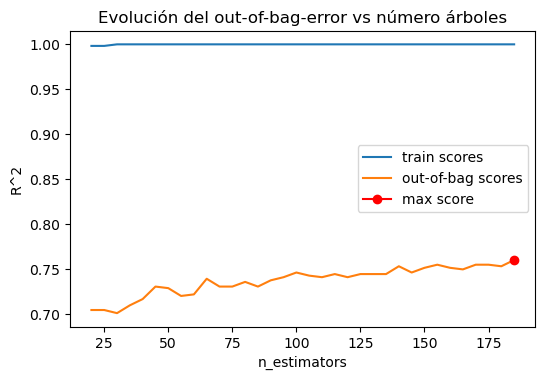

In [16]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(20, 190, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    rf = RandomForestClassifier(
                n_estimators = n_estimators,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    oob_scores.append(rf.oob_score_)

# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

## Tratamiento para el desbalanceo de la muestras

Usar el parámetro $class\_weigth = "balanced"$

# $class\_weigth = \frac{n\_samples} {(n\_classes * np.bincount(y))}$

In [17]:
768/(2*np.bincount(y))

array([0.768     , 1.43283582])

In [18]:
rf = RandomForestClassifier(n_estimators=110 , class_weight="balanced" , random_state = 123)
rf.fit(X_train , y_train)
rf.score(X_test , y_test)

0.796875

## KFolds Cross Validation

In [19]:
seed=123

kfold = KFold(n_splits=5, shuffle=True , random_state=seed)
cvscores_test = []
cvscores_train = []
i=0
for train, test in kfold.split(X, y):
    i+=1
    #print(train)
    X_train_ = X.iloc[train]
    y_train_ = y.iloc[train]

    X_test_ = X.iloc[test]
    y_test_ = y.iloc[test]

    dt = RandomForestClassifier(n_estimators=30 , random_state = 123)
    dt.fit(X_train_ , y_train_)

    print("Accuracy folds: %d" % i)
    scores_train = dt.score(X_train_, y_train_)
    print("Train: %.2f%%" % (scores_train*100))
    cvscores_train.append(scores_train * 100)

    scores_test = dt.score(X_test_, y_test_)
    print("Test: %.2f%% " % (scores_test*100))
    cvscores_test.append(scores_test * 100)

print("Mean train accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores_train), np.std(cvscores_train)))
print("Mean test accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores_test), np.std(cvscores_test)))

Accuracy folds: 1
Train: 99.35%
Test: 80.52% 
Accuracy folds: 2
Train: 99.84%
Test: 75.32% 
Accuracy folds: 3
Train: 99.67%
Test: 72.73% 
Accuracy folds: 4
Train: 100.00%
Test: 79.08% 
Accuracy folds: 5
Train: 100.00%
Test: 75.16% 
Mean train accuracy: 99.77% (+/- 0.24%)
Mean test accuracy: 76.56% (+/- 2.84%)


## StratifiedKFolds Cross Validation

In [20]:
from sklearn.model_selection import StratifiedKFold
seed=123

kfold = StratifiedKFold(n_splits=5, shuffle=True , random_state=seed)
cvscores_test = []
cvscores_train = []
i=0
for train, test in kfold.split(X, y):
    i+=1
    #print(train)
    X_train_ = X.iloc[train]
    y_train_ = y.iloc[train]

    X_test_ = X.iloc[test]
    y_test_ = y.iloc[test]

    dt = RandomForestClassifier(n_estimators=30 , class_weight="balanced" , random_state = 123)
    dt.fit(X_train_ , y_train_)

    print("Accuracy folds: %d" % i)
    scores_train = dt.score(X_train_, y_train_)
    print("Train: %.2f%%" % (scores_train*100))
    cvscores_train.append(scores_train * 100)

    scores_test = dt.score(X_test_, y_test_)
    print("Test: %.2f%% " % (scores_test*100))
    cvscores_test.append(scores_test * 100)

print("Mean train accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores_train), np.std(cvscores_train)))
print("Mean test accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores_test), np.std(cvscores_test)))

Accuracy folds: 1
Train: 99.84%
Test: 77.92% 
Accuracy folds: 2
Train: 100.00%
Test: 79.87% 
Accuracy folds: 3
Train: 100.00%
Test: 72.08% 
Accuracy folds: 4
Train: 100.00%
Test: 75.82% 
Accuracy folds: 5
Train: 100.00%
Test: 76.47% 
Mean train accuracy: 99.97% (+/- 0.07%)
Mean test accuracy: 76.43% (+/- 2.58%)


# EJERCICIO

## Búsqueda de parámetros usando la GridSearch

Con base en la información analizada previamente, elabores una malla de búsqueda (GridSearch) para encontrar los mejores hiperparámetros.

In [24]:
from sklearn.model_selection import GridSearchCV
parameters = {
    
    "n_estimators" : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "max_depth" : [None, 3, 5, 7, 9, 11],
    
    ## Relaciona aquí los hiperparámetros que usted concidere necesarios para evaluar y
    ## encontrar el mejor desempaño del modelo. Parámetros como n_estimator, max_depth, etc.
    ## La sintaxis sería "n_estimator" : [Lista con los valores]

              }
dt = RandomForestClassifier(random_state=123 , n_jobs=-1)
clf = GridSearchCV(dt, parameters , cv=5 , verbose=1)
clf.fit(X_train, y_train)
clf.best_estimator_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


RandomForestClassifier(max_depth=5, n_estimators=30, n_jobs=-1,
                       random_state=123)

In [25]:
clf.best_params_

{'max_depth': 5, 'n_estimators': 30}

In [26]:
best_model = RandomForestClassifier( n_estimators=30, max_depth=5, n_jobs=-1, random_state=123
                            ## Usar los mejores parámetros encontradas en el gridseach anterior.
                            )
best_model.fit(X_train , y_train)
best_model.score(X_test , y_test)

0.8020833333333334

#  Métricas

In [27]:
preds = best_model.predict(X_test)
mat = confusion_matrix(y_test , preds)
mat

array([[116,  14],
       [ 24,  38]])

#### Accuracy

In [28]:
acc = accuracy_score(y_test , preds)
acc

0.8020833333333334

####  Precision

In [29]:
precision = np.diag(mat)/np.sum(mat,axis=1)
precision

array([0.89230769, 0.61290323])

####  Recall

In [30]:
recall = np.diag(mat)/np.sum(mat , axis=0)
recall

array([0.82857143, 0.73076923])

#### F1 Score

In [31]:
F1 = 2*(precision*recall)/(precision+recall)
F1_inv = F1[::-1]
F1

array([0.85925926, 0.66666667])

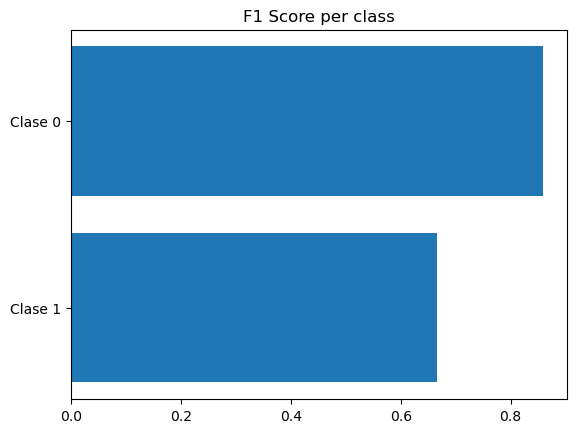

In [32]:
nam_classes = ['Clase 0', 'Clase 1' ]
nom_inv = nam_classes
nom_inv.reverse()
datos = F1_inv

plt.barh(nom_inv, datos, align='center')
plt.title("F1 Score per class")
plt.show()

#### Confusion Matrix

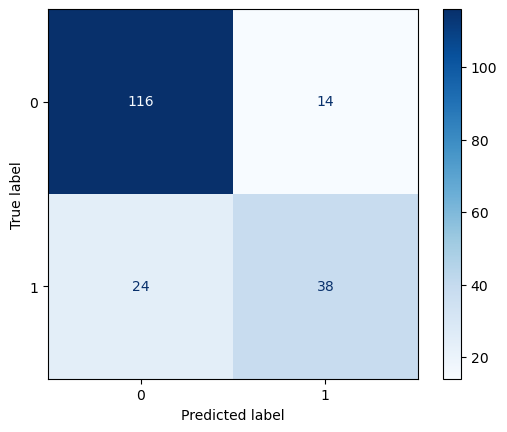

In [33]:
cm = confusion_matrix(y_test, preds, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=best_model.classes_ )
disp.plot(cmap='Blues')

plt.show()

### Importancia de las características

Feature Importances: [0.0994763  0.2777121  0.04492229 0.05548756 0.06229785 0.22187231
 0.09102807 0.14720353]


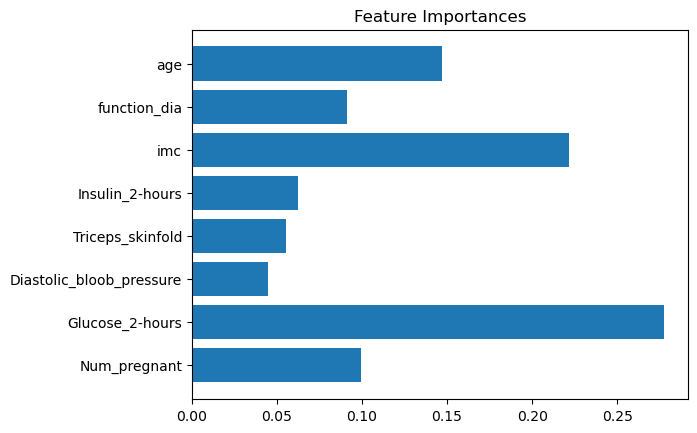

In [34]:
print('Feature Importances:',best_model.feature_importances_)
plt.barh(list(df.columns)[:len(list(df.columns))-1] , best_model.feature_importances_ )
plt.title("Feature Importances")
plt.show()